
# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class.

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates.
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [1]:
# imports in first cell
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

Note that the 28x28 quickdraw images have already been "flattened" into 784: dimensional vectors

In [2]:
# load the quickdraw data set
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks
data = np.load('/content/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

Cloning into 'DS-Unit-4-Sprint-2-Neural-Networks'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 527 (delta 85), reused 132 (delta 70), pack-reused 365
Receiving objects: 100% (527/527), 83.36 MiB | 20.09 MiB/s, done.
Resolving deltas: 100% (269/269), done.
(100000, 784)
(100000,)


These are the names of the 10 image classes

In [3]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

We can explore the data a bit by reshaping the vectors back to images and displaying them with their labels. <br>
Turns out the data has 10 blocks of 10,000 images of each of the above labels, in order. <br>
So the code below displays the first image of each class.

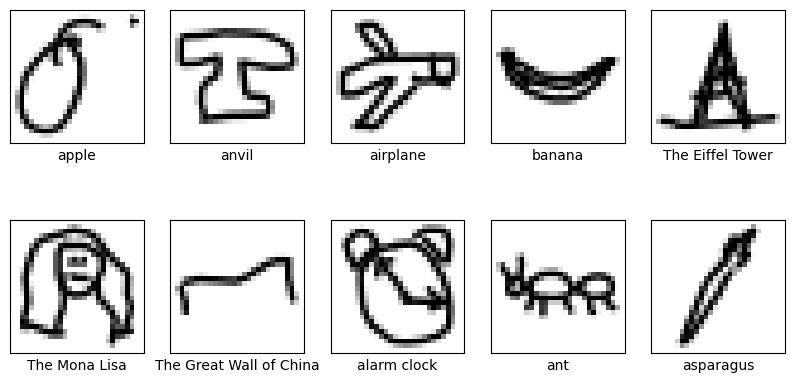

In [4]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

Say hello to the Quickdraw dataset!

You'll be using this dataset a lot this week as an alternative to the MNIST digits data set, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [5]:
# always a good idea to shuffle your dataset!
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20
- **Use** the `validation_split` keyword in `model.fit()` to automatically create a training / validation dataset from within the model. Specify a percentage, such as `validation_split = 0.2`

Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates

In [10]:
# get dim of image row vectors and save to input_dim

# get number of unique labels and save to n_output_labels
n_output_labels = np.unique(y).shape[0]

# normalize image data to values between 0 and 1 (by dividing by max pixel value)
X_scaled = X / 255.0

input_dim = X_scaled.shape[1]

In [7]:
# a check on your data prep
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [17]:
# instantiate a sequential object and call it model, then add the layers to your model
model = Sequential()

# add a compile layer but don't fit your model yet

# Add the input layer and the first hidden layer h1
model.add(Dense(500, activation='relu', input_dim=input_dim))

# Second hidden layer h2
model.add(Dense(250, activation='relu'))

# Third hidden layer, h3
model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(n_output_labels, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
# a check on your model architecture
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [15]:
# check out your model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               392500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 20

# fit your model and save training results to history
history = model.fit(X_scaled, y,
                    epochs=epochs,
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 19s 5ms/step - loss: 0.9896 - accuracy: 0.7057 - val_loss: 0.7321 - val_accuracy: 0.7892
Epoch 2/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6712 - accuracy: 0.8040 - val_loss: 0.6225 - val_accuracy: 0.8198
Epoch 3/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5734 - accuracy: 0.8309 - val_loss: 0.5724 - val_accuracy: 0.8306
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5079 - accuracy: 0.8492 - val_loss: 0.5179 - val_accuracy: 0.8461
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.4589 - accuracy: 0.8637 - val_loss: 0.4905 - val_accuracy: 0.8554
Epoch 6/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.4203 - accuracy: 0.8753 - val_loss: 0.4617 - val_accuracy: 0.8659
Epoch 7/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.3877 - accuracy: 0.8863 - val_loss: 0.4484 - val_accur

----
### Visualize the Results

- Move results in `history` to a dataframe.
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch.
- Analyze the results and write a couple of observations.

At what point should we have stopped training the model and why?

In [20]:
# Convert the history.history dict to a pandas DataFrame
df = pd.DataFrame(history.history)

In [21]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

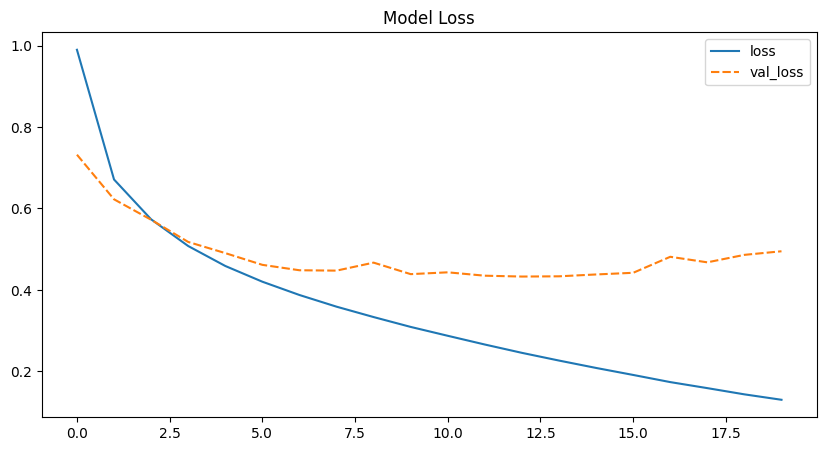

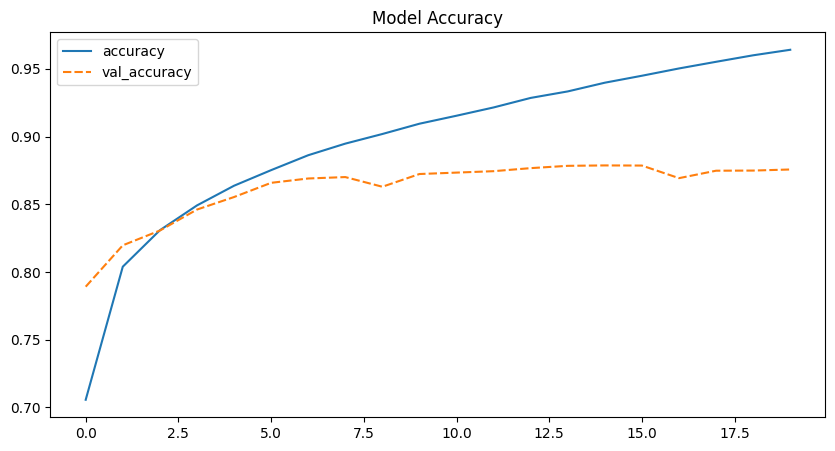

In [22]:
# use seaborn to plot loss and accuracy metrics

# Plot Loss
plt.figure(figsize=(10,5))
sns.lineplot(data=df[['loss', 'val_loss']])
plt.title('Model Loss')
plt.show()

# Plot Accuraacy
plt.figure(figsize=(10,5))
sns.lineplot(data=df[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy')
plt.show()

### Observations

Based on the plot of the training and validation loss, answer the following questions.

**Was our model able to learn throughout the 20 epochs? Why or why not?**

Yes, our model was able to learn throughout the 20 epochs. This is indicated by the consistently decreasing training loss and the steadily increasing training accuracy. These trends suggest that the model was continuously improving its performance on the training data over time.

**Is our model overfitting? Why or why not?**

It seems like the model might be starting to overfit towards the end of the training. This is suggested by the fact that the training loss is still decreasing while the validation loss is not decreasing at the same rate and even increases slightly. Overfitting is indicated when the model continues to improve on the training data (lower training loss) but performs worse or does not improve on the validation data (increasing or stagnant validation loss). The accuracy trends support this: the training accuracy is steadily increasing and approaching 1 (indicating nearly perfect performance on the training data), while the validation accuracy remains fairly steady, showing no significant improvement over time.



**Could the model score benefit from additional epochs? Why or why not?**

Given the current trends, it does not seem that additional epochs would be beneficial. The model appears to be overfitting, indicated by the diverging trends in training and validation loss, and the plateau in validation accuracy. More epochs would likely lead to even lower training loss and higher training accuracy, but at the cost of potentially increasing the validation loss and not improving the validation accuracy, which is a classic symptom of overfitting. This suggests the model would not generalize well to new, unseen data.

-----
## Change Optimizers

Let's compare model performance between different optimizers.
- Build a new model, identical to the last one but using `adam` for the optimizer.
- Train (fit) the model
- Save the modeling results to adam_history, so we don't erase the results from the previous model run
- Visualize the training results just as we did for the last model.


In [23]:
# train the same model as above but use the sgd optimizer if you used adam previously (or use adam if you used sgd previously)
# Adam computes adaptive learning rates for different parameters, meaning it performs well even with little tuning of the hyperparameters.

model_adam = Sequential()

model_adam.add(Dense(500, activation='relu', input_dim=input_dim))

model_adam.add(Dense(250, activation='relu'))

model_adam.add(Dense(100, activation='relu'))

model_adam.add(Dense(n_output_labels, activation='softmax'))

model_adam.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Fit the model and save training results to adam_history
adam_history = model_adam.fit(X_scaled, y,
                              epochs=epochs,
                              validation_split=0.2
                             )

Epoch 1/20
2500/2500 [==============================] - 12s 4ms/step - loss: 0.5941 - accuracy: 0.8184 - val_loss: 0.4545 - val_accuracy: 0.8647
Epoch 2/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.4169 - accuracy: 0.8730 - val_loss: 0.4217 - val_accuracy: 0.8729
Epoch 3/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.3454 - accuracy: 0.8946 - val_loss: 0.4142 - val_accuracy: 0.8768
Epoch 4/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2910 - accuracy: 0.9095 - val_loss: 0.4163 - val_accuracy: 0.8755
Epoch 5/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2519 - accuracy: 0.9203 - val_loss: 0.4305 - val_accuracy: 0.8798
Epoch 6/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2157 - accuracy: 0.9314 - val_loss: 0.4822 - val_accuracy: 0.8796
Epoch 7/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1869 - accuracy: 0.9398 - val_loss: 0.4740 - val_acc

In [28]:
# a check that we're using the correct optimizer in this model
opt_name = model_adam.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

In [29]:
# Convert the history.history dict to a pandas DataFrame
df_adam = pd.DataFrame(adam_history.history)

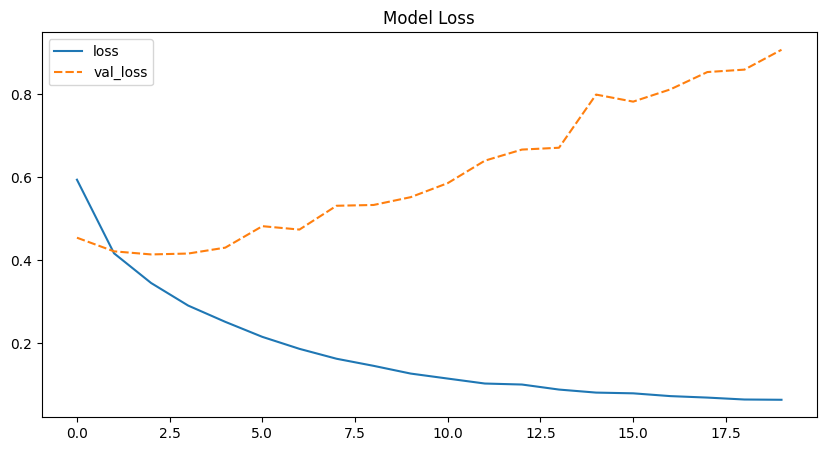

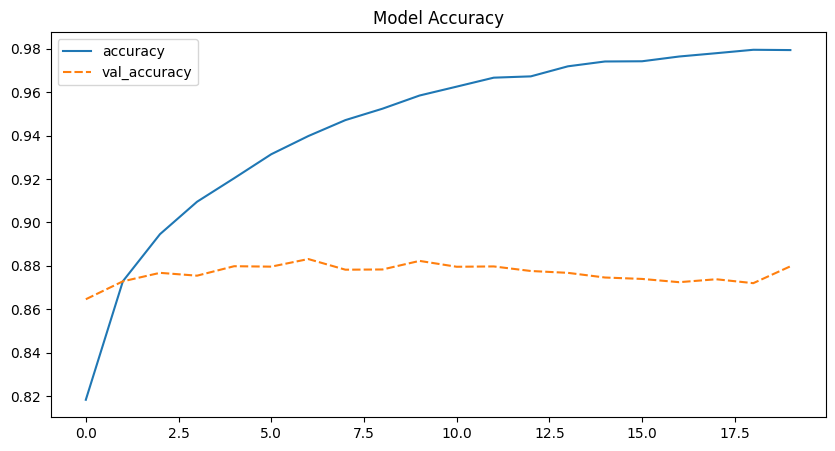

In [30]:
# use seaborn to plot loss and accuracy metrics

# Plot Loss
plt.figure(figsize=(10,5))
sns.lineplot(data=df_adam[['loss', 'val_loss']])
plt.title('Model Loss')
plt.show()

# Plot Accuraacy
plt.figure(figsize=(10,5))
sns.lineplot(data=df_adam[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy')
plt.show()

### Observations

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions.

**Is our model overfitting? Why or why not?**

Yes, our model seems to be overfitting. The steadily increasing validation loss is a strong indication of this. Overfitting is happening when the model performs increasingly well on the training data (lower training loss) but performs worse on the validation data (increasing validation loss). This suggests that the model is memorizing the training data and losing its ability to generalize to unseen data.

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

Given the current trends, it's unlikely that training for more epochs would improve the model. The validation loss is already increasing, which suggests that the model is overfitting. Training for more epochs would likely exacerbate the overfitting.

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

There are several techniques you could use to mitigate overfitting:

Early stopping: This involves stopping the training process when the model's performance on the validation set starts to degrade (i.e., the validation loss starts to increase). You have already observed that the validation loss begins to increase consistently after a certain epoch, so you could set the training to stop at that point.

Regularization: This is a technique that discourages learning overly complex models by adding a penalty to the loss function based on the weights of the neurons. In effect, it encourages the model to have smaller weights, leading to a simpler model.

Dropout: This is a technique where randomly selected neurons are ignored (or "dropped out") during training. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. This helps to prevent overfitting by making sure the model is robust and can provide accurate predictions even when some neurons are dropped out.

Data augmentation: This involves creating new training samples by applying various transformations to the existing data, such as rotation, scaling, shifting, etc. This not only makes the model more robust to variations in the input data, but also effectively increases the size of the training data, which can help reduce overfitting.

You can use one or a combination of these techniques to help your model generalize better to unseen data and thereby mitigate overfitting.

------
# Conclusion

You have observed by comparing the two models that are identical except for the optimizer, that the choice of the optimizer can considerably influence the performance of a neural network.

You might not know

- why changing the optimizer from Stochastic Gradient Descent over to Adam made a difference.
- how Gradient Descent works
- or that Adam is known as Adaptive Gradient Descent (i.e., is it a different version of ordinary Gradient Descent).

But that's ok - tomorrow's lesson will be a deep dive into Gradient Descent. You'll learn the theory of Gradient Descent, we'll code up Gradient Descent from scratch, and we'll talk about how Adam is different from ordinary Gradient Descent.

-----
# Preparation for Tomorrow

In preparation for tomorrow, you might need to watch a few videos. I say it might because you may or may not already be comfortable with multi-variate calculus.

### Theory of Calculus
The theory of Gradient Descent rests on [**the derivative from Calculus**](https://www.youtube.com/watch?v=WUvTyaaNkzM). If you've never taken a Calculus course before, or are a bit rusty, definitely watch this video in preparation for tomorrow's lesson. The takeaway here is to understand the derivative conceptually; you won't be asked to calculate any derivatives by hand.

### The Gradient - a Multi-Dimensional Derivative
Once you've watched the previous video, you will be ready to understand how to conceptualize a derivative in an N-dimensional space (where N is any number ranging from 2, 3, 4, ..., all the way to a very large number of dimensions N ). [**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the takeaway. The point of this video is to help you understand the Gradient visually using 3D surfaces. You should also know that the Gradient is made up of partial derivatives, more on this tomorrow.

### Contour Maps
It is very common to visual 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video to [**understand the relationship between 3D surfaces and 2D contour maps.**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation

Unlike standard Sklearn ML models, neural networks use Gradient Descent and something called Backpropagatin to learn from the data. [**In order to understand how backpropagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=acdX4YamDtU). The takeaway here is to understand how a partial derivative can be decomposed into a product of multiple derivatives.

------
# Stretch Goals

### This Section is Optional!

Only after you've completed the above work and watched the recommended videos are you then encouraged to experiment with building a few more models and analyze their results.

Here are some suggestions to help you get started.

- Train the same model using the Sigmoid and Relu activation functions and note the difference in their learning outcomes. [**Keras docs on activation functions**](https://keras.io/api/layers/activations/). We'll cover the Relu activation function in Sprint 2 Module 3.
- Train the same model using normalized and non-normalized data and note the difference in their learning outcomes.


The objective here is to get more practice with the Keras API (i.e., building models) and run a couple of experiments to help set you up for future lessons. In order words, we'll be discussing different activation functions and the effect of normalized data on model training.



---

Activation functions introduce non-linear properties to the model, which allow it to learn from the complex patterns in the data. Two commonly used activation functions are the sigmoid function and the rectified linear unit (ReLU) function.

The sigmoid function maps the input values between 0 and 1, which makes it useful in the output layer for binary classification problems. However, it can lead to a problem called "vanishing gradients," which makes it harder for the model to learn.

The ReLU function, on the other hand, maps all negative inputs to zero, while positive inputs are left unchanged. ReLU has become more popular in recent years because it tends to perform well in practice and helps to mitigate the vanishing gradients problem.

You can change the activation function in the hidden layers of the model simply by changing the activation argument in the Dense() function.

Here's how you can modify the model to use the sigmoid activation function:

---



In [31]:
# Create a new Sequential model
model_sigmoid = Sequential()

# Add the input layer and the first hidden layer h1
model_sigmoid.add(Dense(500, activation='sigmoid', input_dim=input_dim))

# Add the second hidden layer h2
model_sigmoid.add(Dense(250, activation='sigmoid'))

# Add the third hidden layer h3
model_sigmoid.add(Dense(100, activation='sigmoid'))

# Add the output layer
model_sigmoid.add(Dense(n_output_labels, activation='softmax'))

# Compile the model with Adam optimizer
model_sigmoid.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
# fit your model and save training results to history
sig_history = model.fit(X_scaled, y,
                    epochs=epochs,
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1180 - accuracy: 0.9682 - val_loss: 0.4929 - val_accuracy: 0.8769
Epoch 2/20
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1071 - accuracy: 0.9713 - val_loss: 0.5428 - val_accuracy: 0.8675
Epoch 3/20
2500/2500 [==============================] - 12s 5ms/step - loss: 0.0954 - accuracy: 0.9748 - val_loss: 0.5664 - val_accuracy: 0.8658
Epoch 4/20
2500/2500 [==============================] - 14s 6ms/step - loss: 0.0863 - accuracy: 0.9773 - val_loss: 0.5459 - val_accuracy: 0.8741
Epoch 5/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0780 - accuracy: 0.9798 - val_loss: 0.5776 - val_accuracy: 0.8723
Epoch 6/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0694 - accuracy: 0.9829 - val_loss: 0.5798 - val_accuracy: 0.8756
Epoch 7/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0619 - accuracy: 0.9854 - val_loss: 0.6112 - val_accura

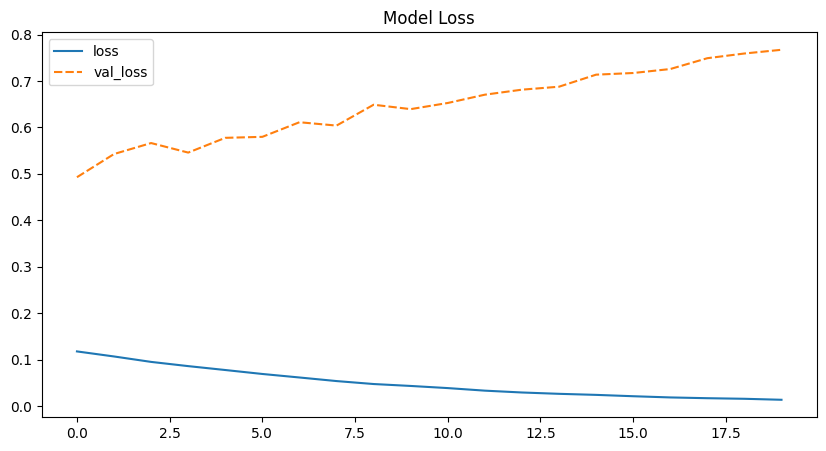

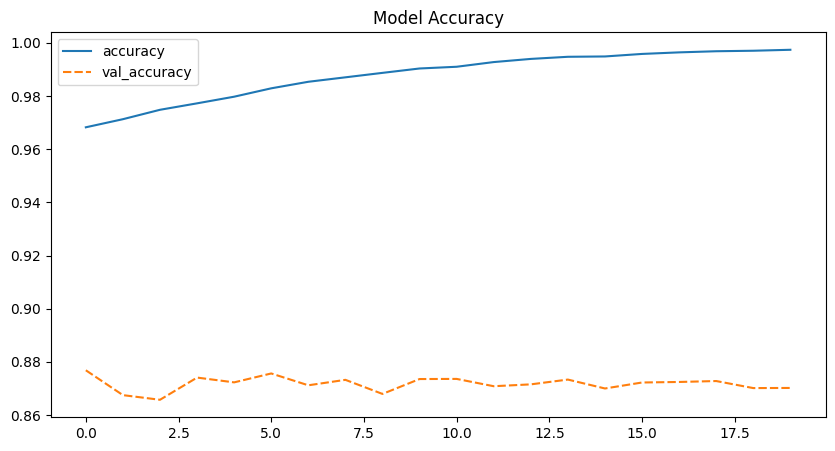

In [33]:
# use seaborn to plot loss and accuracy metrics
df_sig = pd.DataFrame(sig_history.history)

# Plot Loss
plt.figure(figsize=(10,5))
sns.lineplot(data=df_sig[['loss', 'val_loss']])
plt.title('Model Loss')
plt.show()

# Plot Accuraacy
plt.figure(figsize=(10,5))
sns.lineplot(data=df_sig[['accuracy', 'val_accuracy']])
plt.title('Model Accuracy')
plt.show()